In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import rdScaffoldNetwork

RDKit WARNING: [11:02:29] Enabling RDKit 2020.03.1dev1 jupyter extensions


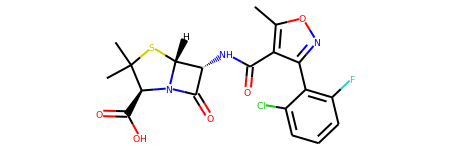

In [2]:
# Flucloxacillin
m = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
m

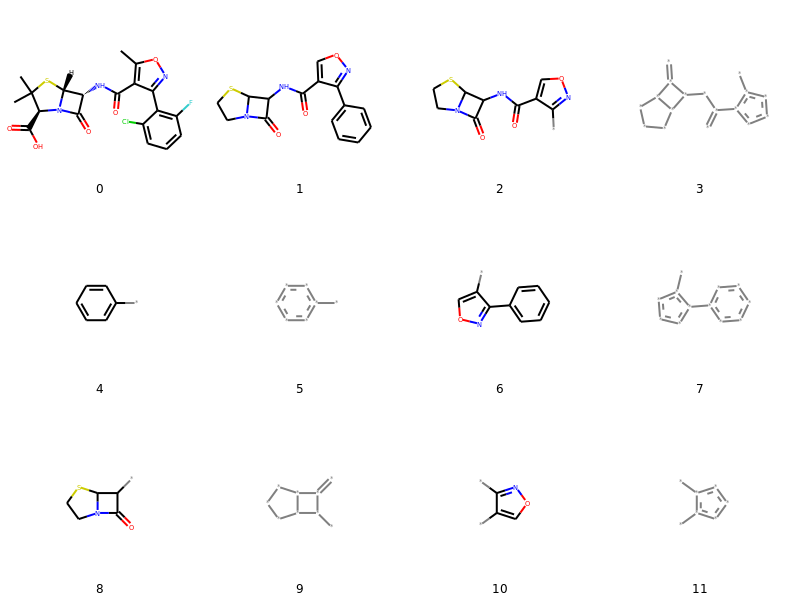

In [3]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()
params.includeGenericScaffolds = True
params.includeScaffoldsWithoutAttachments = False
net = rdScaffoldNetwork.CreateScaffoldNetwork([m],params)
print(net.edges)
nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=[str(x) for x in range(len(nodemols))],molsPerRow=4)


In [4]:
from pyvis.network import Network
from urllib import parse
g = Network(notebook=True,height='600px',width='800px')
for i,smi in enumerate(net.nodes):
    qsmi = parse.quote(smi)
    imgurl = f"https://mol-renderer2-dev.t5ix.io/to_img/mol.png?smiles={qsmi}&w=200&h=150"
    g.add_node(i,shape="image",label=' ',
               image =imgurl, title=f'<img src="{imgurl}"/>')
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
g.show("basic.html")

## More complex example with multiple molecules

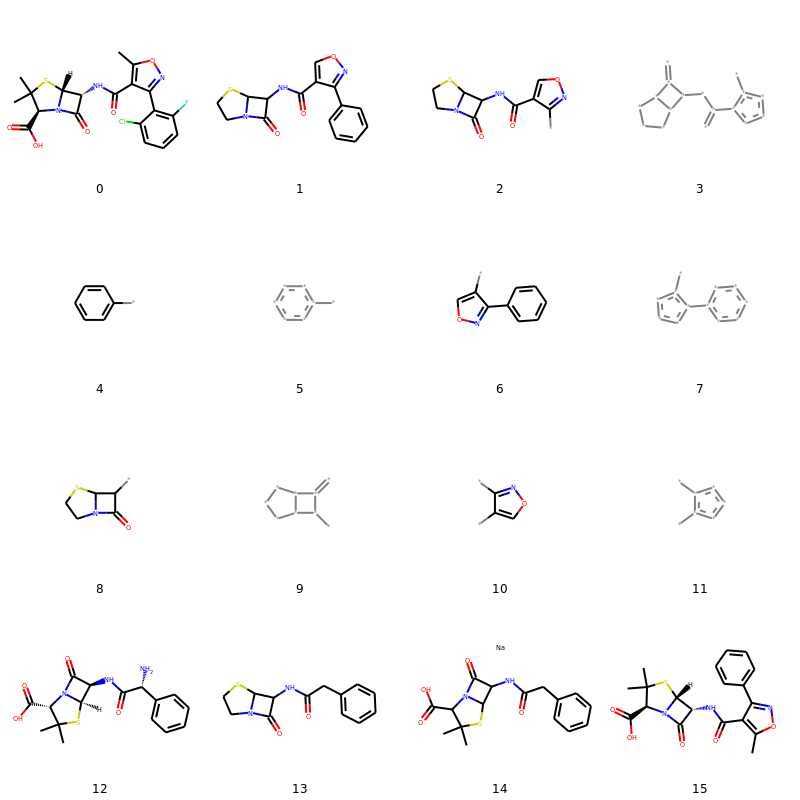

In [5]:
# Flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
params = rdScaffoldNetwork.ScaffoldNetworkParams()
params.includeGenericScaffolds = True
params.includeScaffoldsWithoutAttachments = False
net = rdScaffoldNetwork.CreateScaffoldNetwork([flu,amp,pen,ox],params)
nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=[str(x) for x in range(len(nodemols))],molsPerRow=4)


In [6]:
from collections import Counter
maxCount = max(net.counts)
g = Network(notebook=True,height='600px',width='800px')
for i,smi in enumerate(net.nodes):
    qsmi = parse.quote(smi)
    imgurl = f"https://mol-renderer2-dev.t5ix.io/to_img/mol.png?smiles={qsmi}&w=200&h=150"
    g.add_node(i,shape="image",label=' ',
               image =imgurl, title=f'<img src="{imgurl}"/>', size=30*net.counts[i]/maxCount)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
g.show("multiple.html")

In [7]:
from pyvis.network import Network
from urllib import parse

m = Chem.MolFromSmiles('c1ccccc1CC1NC(=O)CCC1')

params = rdScaffoldNetwork.ScaffoldNetworkParams()
net = rdScaffoldNetwork.CreateScaffoldNetwork([m],params)
nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
from collections import Counter
maxCount = max(net.counts)
g = Network(notebook=True,height='600px',width='800px')
for i,smi in enumerate(net.nodes):
    qsmi = parse.quote(smi)
    imgurl = f"https://mol-renderer2-dev.t5ix.io/to_img/mol.png?smiles={qsmi}&w=200&h=150"
    g.add_node(i,shape="image",label=' ',
               image =imgurl, title=f'<img src="{imgurl}"/>', size=30*net.counts[i]/maxCount)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
g.show("simple.html")

In [8]:
type('fo')

str

In [9]:
def mergeAttachPointsToAtoms(mol,propName='attachPt'):
    if type(mol) == type('foo'):
        mol = Chem.MolFromSmiles(mol)
        returnSmiles = True
    else:
        returnSmiles = False
    rwm = Chem.RWMol(mol)
    # start by tagging all the neighbors:
    toRemove = []
    for at in rwm.GetAtoms():
        if at.GetAtomicNum()==0 and at.GetDegree()==1:
            nbr = at.GetNeighbors()[0]
            if at.GetIsotope():
                iso = str(at.GetIsotope())
            else:
                iso = ''
            nbr.SetProp('attachPt',f'[{iso}*]')
            if nbr.GetIsAromatic() and nbr.GetAtomicNum() != 6:
                nbr.SetNoImplicit(True)
                nbr.SetNumExplicitHs(1)
            toRemove.append(at.GetIdx())
    # now remove the atoms
    for idx in sorted(toRemove,reverse=True):
        rwm.RemoveAtom(idx)
    if not returnSmiles:
        return rwm.GetMol()
    else:
        return Chem.MolToCXSmiles(rwm)

In [10]:
from pyvis.network import Network
from urllib import parse

m = Chem.MolFromSmiles('c1ccccc1C(=O)NC1NC(=O)CCC1')
params = rdScaffoldNetwork.ScaffoldNetworkParams()
params.keepOnlyFirstFragment=False
params.includeGenericScaffolds=False
params.includeScaffoldsWithoutAttachments=False
net = rdScaffoldNetwork.CreateScaffoldNetwork([m],params)
nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
from collections import Counter
maxCount = max(net.counts)
g = Network(notebook=True,height='600px',width='800px')
for i,smi in enumerate(net.nodes):
    smi = mergeAttachPointsToAtoms(smi)
    print(smi)
    qsmi = parse.quote(smi)
    imgurl = f"https://mol-renderer2-dev.t5ix.io/to_img/mol.png?smiles={qsmi}&w=200&h=150"
    g.add_node(i,shape="image",label=' ',
               image =imgurl, title=f'<img src="{imgurl}"/>', size=30*net.counts[i]/maxCount)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
g.show("simple2.html")

O=C1CCCC(NC(=O)c2ccccc2)N1
c1ccccc1 |atomProp:2.attachPt.[*]|
O=CNC1CCCC(=O)N1 |atomProp:1.attachPt.[*]|
O=C1CCCCN1 |atomProp:5.attachPt.[*]|
NC(=O)c1ccccc1 |atomProp:0.attachPt.[*]|
NC=O |atomProp:0.attachPt.[*]:1.attachPt.[*]|


In [13]:
from pyvis.network import Network
from urllib import parse

m = Chem.MolFromSmiles('c1ccccc1C(=O)NC1NC(=O)CCC1')
params = rdScaffoldNetwork.BRICSScaffoldParams()
params.keepOnlyFirstFragment=False
params.includeGenericScaffolds=False
params.includeScaffoldsWithoutAttachments=False
net = rdScaffoldNetwork.CreateScaffoldNetwork([m],params)
nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
from collections import Counter
maxCount = max(net.counts)
g = Network(notebook=True,height='600px',width='800px')

# do a viz where we only show nodes with at least 5 atoms:
keepNodes = set()
for i,smi in enumerate(net.nodes):
    if(Chem.MolFromSmiles(smi,sanitize=False).GetNumAtoms()<=4):
        continue
    smi = mergeAttachPointsToAtoms(smi)
    print(smi)
    keepNodes.add(i)
    qsmi = parse.quote(smi)
    imgurl = f"https://mol-renderer2-dev.t5ix.io/to_img/mol.png?smiles={qsmi}&w=200&h=150"
    g.add_node(i,shape="image",label=' ',
               image =imgurl, title=f'<img src="{imgurl}"/>', size=30*net.counts[i]/maxCount)
for e in net.edges:
    if e.beginIdx in keepNodes and e.endIdx in keepNodes:
        g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
g.show("simple3.html")

O=C1CCCC(NC(=O)c2ccccc2)N1
O=Cc1ccccc1 |atomProp:1.attachPt.[1*]|
NC1CCCC(=O)N1 |atomProp:0.attachPt.[5*]|
NC(=O)c1ccccc1 |atomProp:0.attachPt.[5*]|
O=C1CCCCN1 |atomProp:5.attachPt.[13*]|
O=CNC1CCCC(=O)N1 |atomProp:1.attachPt.[6*]|
c1ccccc1 |atomProp:2.attachPt.[16*]|
NC=O |atomProp:0.attachPt.[5*]:1.attachPt.[6*]|


In [14]:
len(net.nodes),len(net.edges)

(10, 20)